In [10]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [2]:
# Instantiate path of training data
train_path = (r"C:\Users\Dalton\Documents\Portfolio Projects\Titanic Dataset\Data\train.csv")

In [3]:
# Read in Train CSV to Pandas dataframe
df = pd.read_csv(train_path)

In [6]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define preprocessing for numeric columns (impute missing values)
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),  # leave strategy empty for now
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (impute missing values and apply one-hot encoding)
categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [8]:
# Define parameter grid
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'classifier__n_estimators': [50, 100, 200],
}

# Instantiate grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

Best parameters: {'classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'median'}
Best cross-validation score: 0.8006303555599331


In [9]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = grid_search.predict(X_test)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy score: {accuracy}")

Test accuracy score: 0.8044692737430168


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

# Define the preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipe = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

# Define the parameter grid
params = {
    'columntransformer__num__num_imputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10],
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe, params, cv=5)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Now we'll set up the pipeline with KNN imputation

# Create a pipeline for KNN imputation followed by a RandomForestClassifier
knn_pipe = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', KNNImputer(n_neighbors=3), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    ),
    RandomForestClassifier(random_state=42)
)

knn_params = {
    'columntransformer__num__n_neighbors': [3, 5, 7]
}

# Create GridSearchCV object
knn_grid_search = GridSearchCV(knn_pipe, knn_params, cv=5)

# Fit grid search
knn_grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params_knn = knn_grid_search.best_params_
best_score_knn = knn_grid_search.best_score_

print("Best KNN parameters:", best_params_knn)
print("Best KNN cross-validation score:", best_score_knn)

Best parameters: {'columntransformer__num__num_imputer__strategy': 'mean', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}
Best cross-validation score: 0.8258642765685018
Best KNN parameters: {'columntransformer__num__n_neighbors': 3}
Best KNN cross-validation score: 0.8104402639613909


In [20]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

classifiers = {
    'LR': LogisticRegression(),
    'SVM': SVC(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(),
}

params = {
    'LR': {'logisticregression__C': [0.01, 0.1, 1, 10]},
    'SVM' : {'svc__C': [0.01, 0.1, 1, 10], 'svc__gamma': [0.001, 0.01, 0.1, 1]},
    'RF': {'randomforestclassifier__n_estimators': [50, 100, 200], 
           'randomforestclassifier__max_depth': [None, 5, 10]},
    'GB': {'gradientboostingclassifier__n_estimators': [50, 100, 200], 
           'gradientboostingclassifier__learning_rate': [0.01, 0.1, 1]},
    'XGB': {'xgbclassifier__n_estimators': [50, 100, 200], 
            'xgbclassifier__learning_rate': [0.01, 0.1, 1]},
    'LGBM': {'lgbmclassifier__n_estimators': [50, 100, 200], 
             'lgbmclassifier__learning_rate': [0.01, 0.1, 1]},
}

for model_name, model in classifiers.items():
    pipe = make_pipeline(
        preprocessor,
        model
    )
    grid_search = GridSearchCV(pipe, params[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best score for {model_name}: {grid_search.best_score_}')

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for LR: {'logisticregression__C': 10}
Best score for LR: 0.8033487639121443
Best parameters for SVM: {'svc__C': 1, 'svc__gamma': 0.1}
Best score for SVM: 0.8257953314291344
Best parameters for RF: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}
Best score for RF: 0.8244361272530287
Best parameters for GB: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__n_estimators': 100}
Best score for GB: 0.8356643356643356
Best parameters for XGB: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__n_estimators': 50}
Best score for XGB: 0.8202403230572244
Best parameters for LGBM: {'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__n_estimators': 200}
Best score for LGBM: 0.8300403821530582


### Gradient Boosting Classifier V1

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


# Instantiate path of training data
train_path = (r"C:\Users\Dalton\Documents\Portfolio Projects\Titanic Dataset\Data\train.csv")

# Read in Train CSV to Pandas dataframe
df = pd.read_csv(train_path)

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Pclass', 'Embarked', 'Cabin', 'Ticket']

# Define the preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipe = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(random_state=42)
)

# Define the parameter grid
params = {
    'columntransformer__num__num_imputer__strategy': ['mean', 'median', 'most_frequent'],
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__max_depth': [3, 5, 10],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 1]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe, params, cv=5)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

Best parameters: {'columntransformer__num__num_imputer__strategy': 'median', 'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 100}
Best cross-validation score: 0.8426868905742145


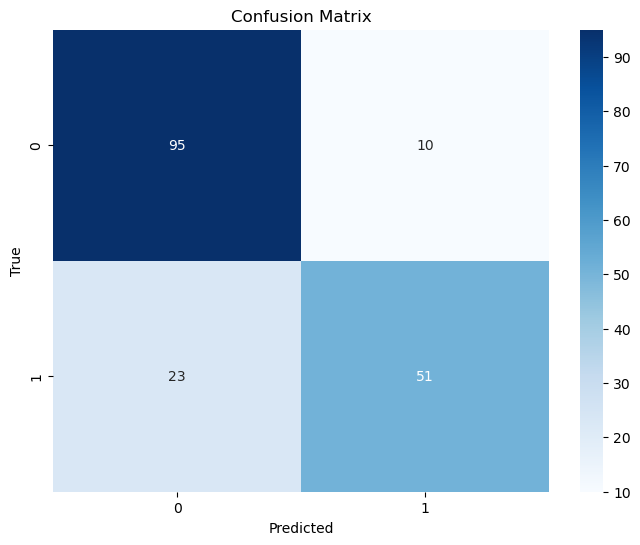

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted labels
y_pred = grid_search.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



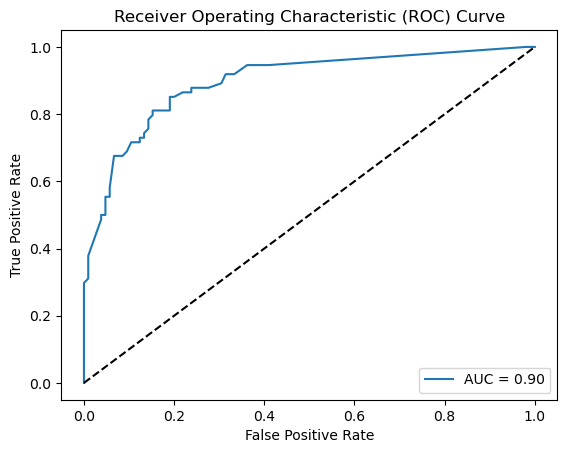

In [28]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()